In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns

In [ ]:
# https://blog.51cto.com/u_15162069/2741185

In [2]:
Airpassenger = pd.read_excel("AirPassengers.xlsx")

In [3]:
Airpassenger.head()

,Date,passengerCount
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


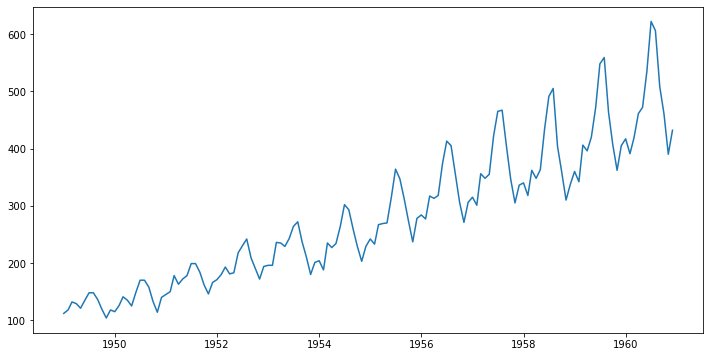

In [4]:
plt.figure(figsize = (12,6))
plt.plot(Airpassenger.Date, Airpassenger.passengerCount)
plt.show()

In [5]:
# Airpassenger['Date'] = Airpassenger['Date'].apply(lambda x : datetime.strptime(x, "%Y/%m/%d"))

In [6]:
Airpassenger["year"] = Airpassenger["Date"].apply(lambda x: x.year)
Airpassenger["qtr"] = Airpassenger["Date"].apply(lambda x: x.quarter)
Airpassenger["yearQtr"]=Airpassenger['year'].astype(str)+'_'+Airpassenger['qtr'].astype(str)
airPassengerByQtr=Airpassenger[["passengerCount","yearQtr"]].groupby(["yearQtr"]).sum()

([<matplotlib.axis.XTick at 0x2a92157f130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

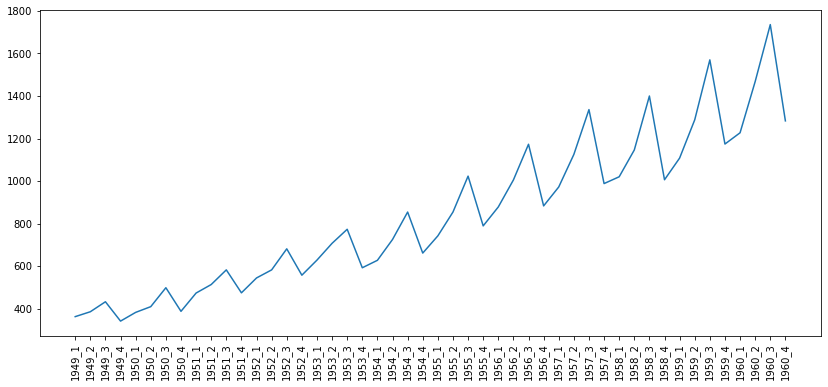

In [8]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(airPassengerByQtr)
plt.xticks(airPassengerByQtr.index, rotation='vertical')

# 经典分解法

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
result = seasonal_decompose(Airpassenger['passengerCount'], model='multiplicative', freq = 4)

C:\Users\tunag\AppData\Local\Temp/ipykernel_4236/3386375872.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(Airpassenger['passengerCount'], model='multiplicative', freq = 4)


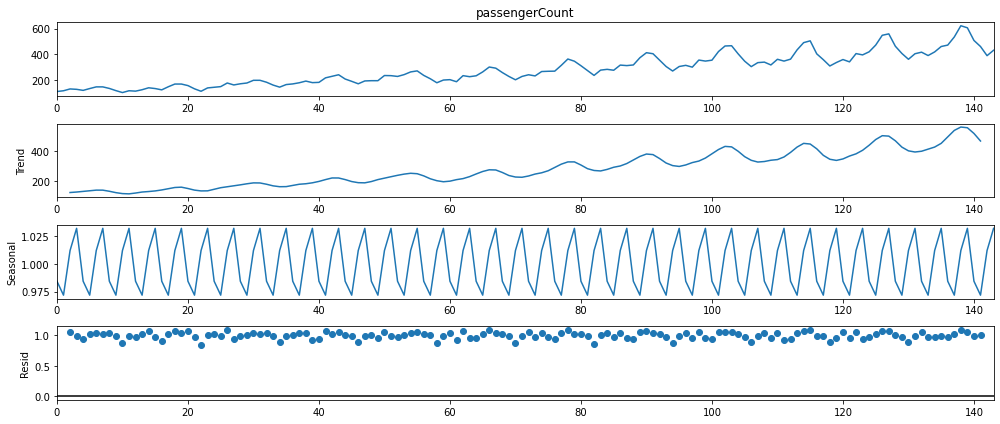

<Figure size 2880x720 with 0 Axes>

In [13]:
result.plot()
plt.figure(figsize=(40,10))
plt.show()

# STL分解

In [14]:
from statsmodels.tsa.seasonal import STL

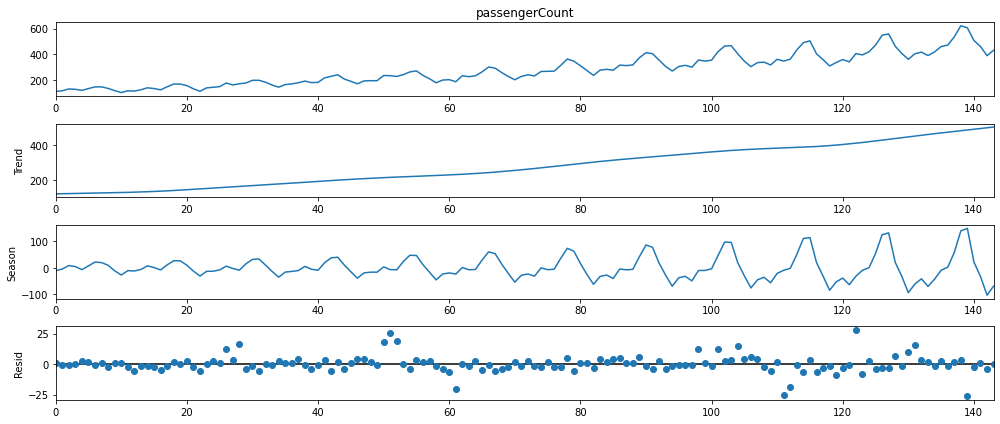

In [15]:
stl = STL(Airpassenger['passengerCount'], period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()

# 简单移动平均

In [16]:
rolling = Airpassenger['passengerCount'].rolling(window=6)
rolling_mean = rolling.mean() 

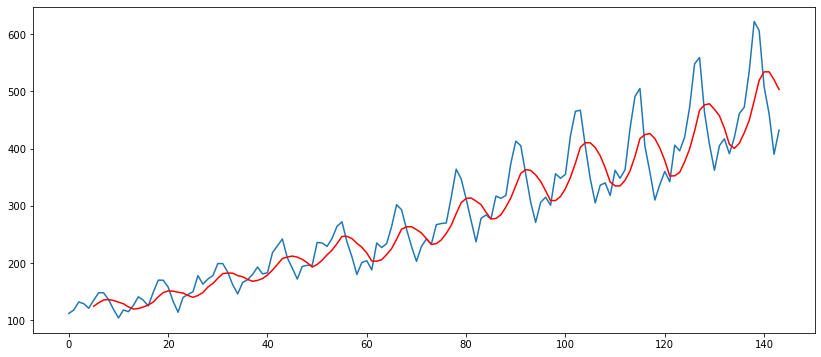

In [18]:
plt.plot(Airpassenger['passengerCount'])
plt.plot(rolling_mean, color='red')
plt.show()

# 加权移动平均

In [19]:
import random
rand = [random.randint(1, i) for i in range(100,110)]
data = {}
data["Sales"] = rand

In [20]:
data

{'Sales': [57, 54, 65, 70, 55, 54, 12, 103, 47, 85]}

In [ ]:
df = pd.DataFrame(data)
weights = np.array([0.5, 0.25, 0.10])

sum_weights = np.sum(weights)
df['WMA']=(df['Sales']
.rolling(window=3, center=True)
.apply(lambda x: np.sum(weights*x)/sum_weights, raw=False))

print(df['WMA'])

d:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
d:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


<AxesSubplot:title={'center':'Forecasts from Exponential Smoothing'}, xlabel='Index', ylabel='Electrical Equipment'>

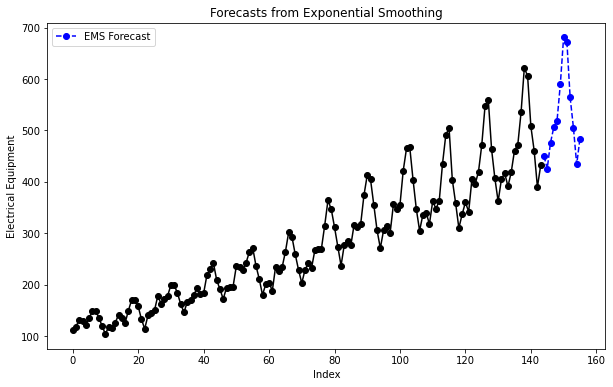

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing
 
EMA_fit = ExponentialSmoothing(Airpassenger['passengerCount'], seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fcast3 = EMA_fit.forecast(12)
 
 
ax = Airpassenger['passengerCount'].plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Exponential Smoothing" )
ax.set_ylabel("Electrical Equipment")
ax.set_xlabel("Index") 
# For plotting fitted values# EMA_fit.fittedvalues.plot(ax=ax, style='--', color='red')

EMA_fit.forecast(12).rename('EMS Forecast').plot(ax=ax, style='--',marker='o', color='blue', legend=True)
